### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:
#load the data

econ_df = pd.read_excel('korea_data.xlsx')
econ_df

,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
0,1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1,1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
2,1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
3,1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
4,1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
5,1974,9.460873,32.533408,1.712705,26.6,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
6,1975,7.863512,28.959267,1.682000,24.8,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
7,1976,13.115159,27.555990,1.596559,22.2,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
8,1977,12.277661,30.630713,1.559039,22.7,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057
9,1978,10.774491,34.532492,1.519197,20.3,34.971026,7.924074,5.582315,30.873052,8.340376,3.1673


In [3]:
econ_df = econ_df.replace("..",'nan')
econ_df

,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
0,1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1,1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
2,1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
3,1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
4,1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
5,1974,9.460873,32.533408,1.712705,26.6,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
6,1975,7.863512,28.959267,1.682000,24.8,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
7,1976,13.115159,27.555990,1.596559,22.2,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
8,1977,12.277661,30.630713,1.559039,22.7,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057
9,1978,10.774491,34.532492,1.519197,20.3,34.971026,7.924074,5.582315,30.873052,8.340376,3.1673


In [4]:
#setting the index

econ_df.index = econ_df['Year']
econ_df

,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,,
1969,1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,1974,9.460873,32.533408,1.712705,26.6,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,1975,7.863512,28.959267,1.682000,24.8,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,1976,13.115159,27.555990,1.596559,22.2,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,1977,12.277661,30.630713,1.559039,22.7,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [5]:
## now there is  year column and we have to make that one

econ_df.index = econ_df['Year']
econ_df = econ_df.drop('Year', axis = 1)

econ_df

,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.6,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.8,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.2,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.7,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [6]:
# change the data type as float

econ_df = econ_df.astype(float)
econ_df

,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.600,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.800,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.200,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.700,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [7]:
#as 2017 lacks a value, so we will drop it

econ_df = econ_df.loc['1969':'2016']
econ_df

,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.600,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.800,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.200,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.700,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [8]:
# change the column name

column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

econ_df = econ_df.rename(columns = column_names)

econ_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.600,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.800,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.200,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.700,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [9]:
## for the larger dtaaset, if there is any "...":

display(".."*100)
display(econ_df.isnull().any())

'........................................................................................................................................................................................................'

gdp_growth                 False
gross_capital_formation    False
pop_growth                 False
birth_rate                 False
broad_money_growth         False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
unemployment               False
dtype: bool

In [10]:
# to check the correlationship

corr = econ_df.corr()
print(corr)

                         gdp_growth  gross_capital_formation  pop_growth  \
gdp_growth                 1.000000                 0.086712    0.567216   
gross_capital_formation    0.086712                 1.000000   -0.215243   
pop_growth                 0.567216                -0.215243    1.000000   
birth_rate                 0.553225                -0.241668    0.978754   
broad_money_growth         0.335249                -0.163803    0.548336   
final_consum_growth        0.855835                 0.266617    0.470449   
gov_final_consum_growth    0.098183                 0.118075    0.357042   
gross_cap_form_growth      0.825496                 0.187885    0.317556   
hh_consum_growth           0.868848                 0.268592    0.442187   
unemployment              -0.160783                -0.618524    0.279486   

                         birth_rate  broad_money_growth  final_consum_growth  \
gdp_growth                 0.553225            0.335249             0.855835   
gro

<AxesSubplot:>

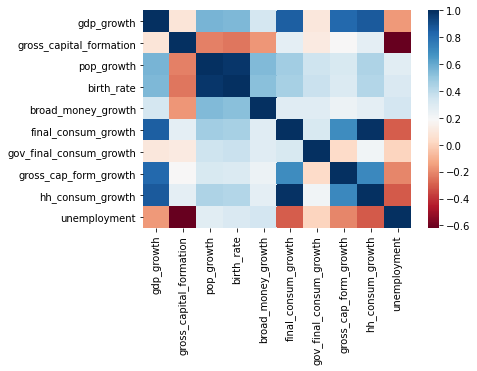

In [11]:
# we will plot a heatmap for visualization of correlation matrix

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

#RdBu is actually colors= Red, Blue

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

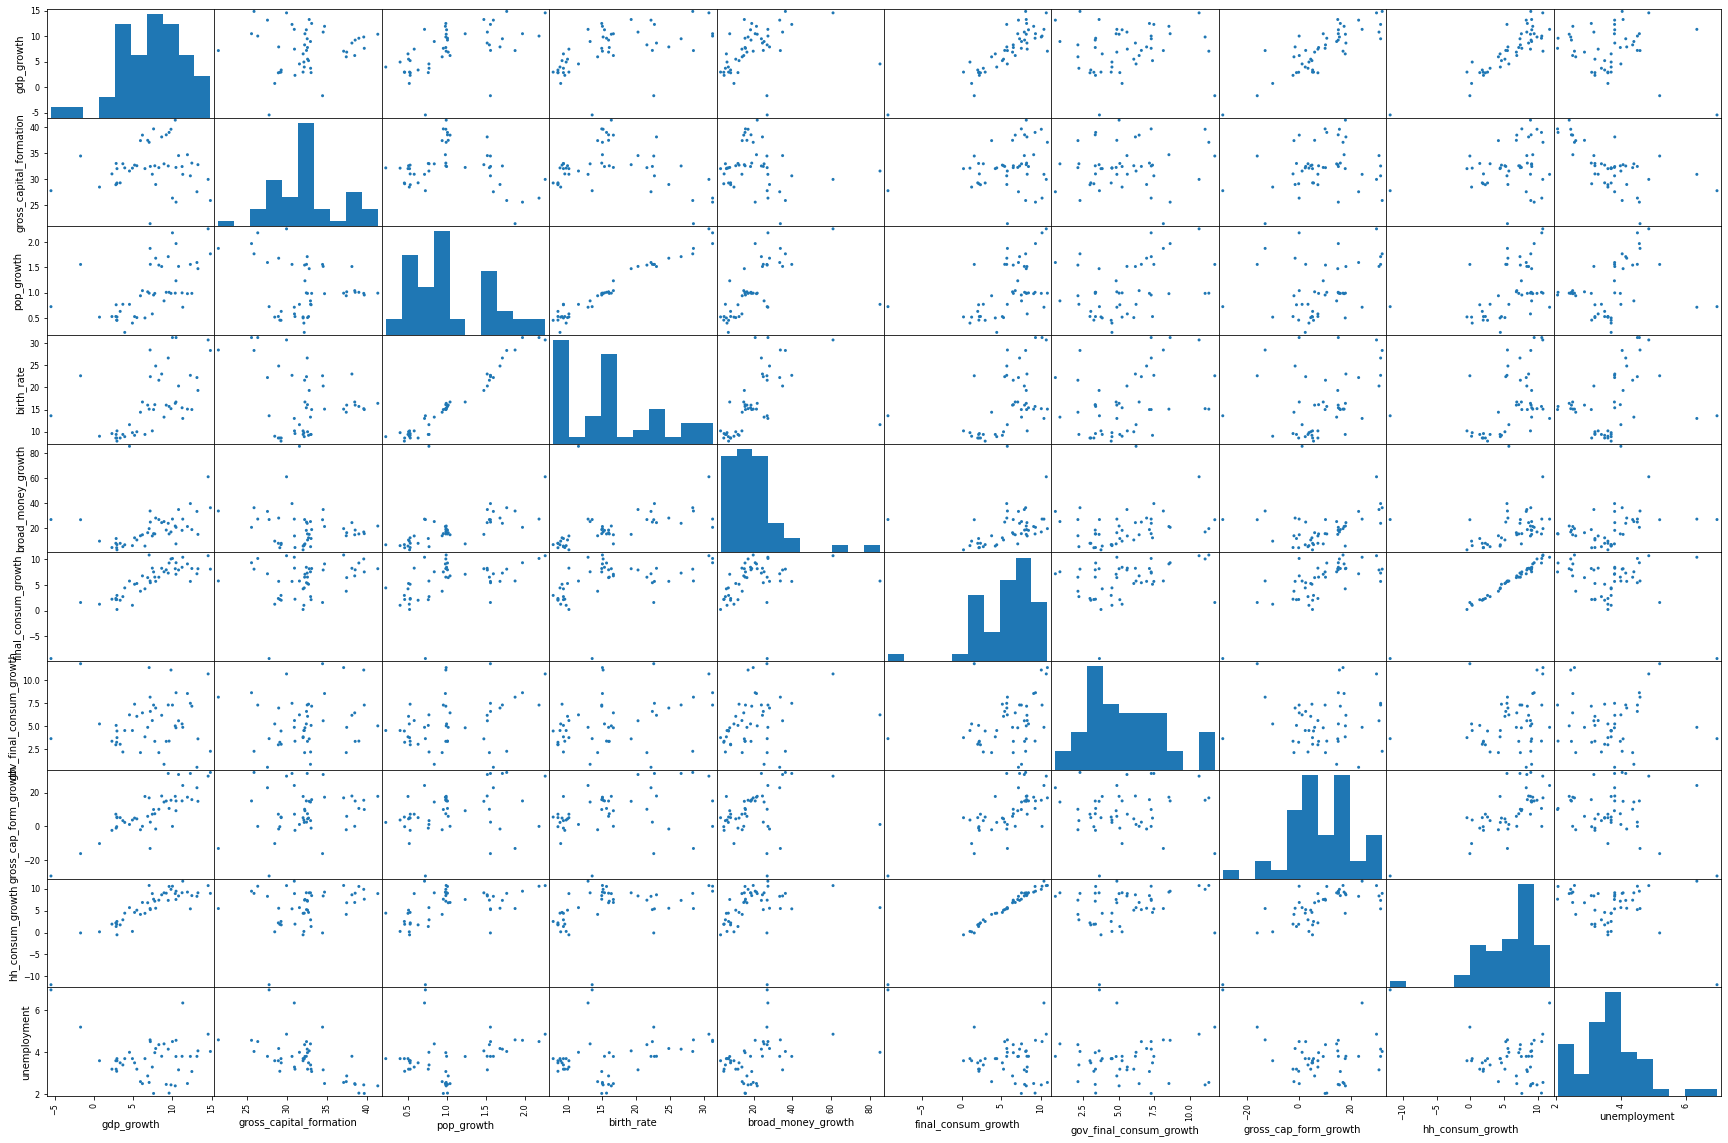

In [12]:
#multicolliearity

econ_df_before = econ_df
X1 = sm.tools.add_constant(econ_df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

pd.plotting.scatter_matrix(econ_df_before, alpha = 1, figsize = (30,20))

plt.show()

In [13]:
# drop the multicolliearity

econ_df_before = econ_df
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1) ##why we are mentioning axis = 1

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(econ_df_before)
X2 = sm.tools.add_constant(econ_df_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                      29.930686
gdp_growth                  9.366468
pop_growth                  2.636300
broad_money_growth          1.604662
gov_final_consum_growth     1.361763
gross_cap_form_growth       3.553567
hh_consum_growth            5.114816
unemployment                1.588427
dtype: float64

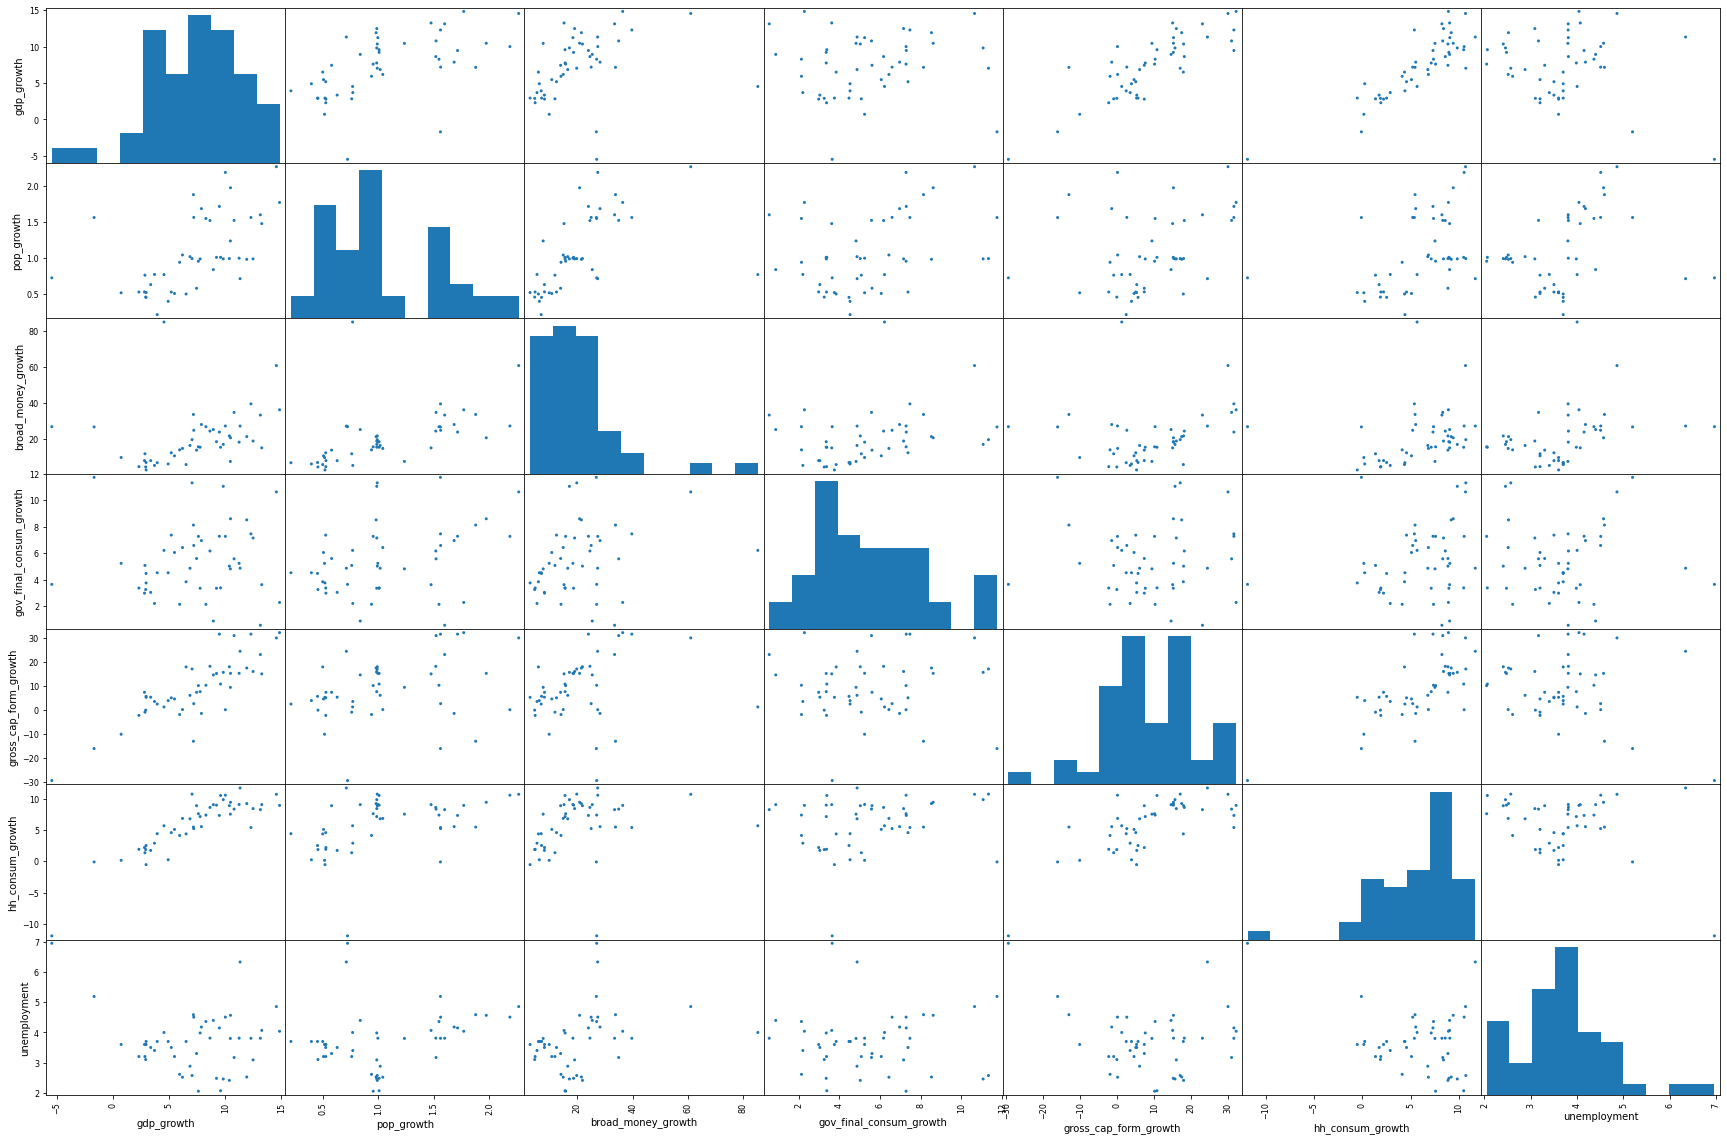

In [14]:
#visualization

pd.plotting.scatter_matrix(econ_df_after, alpha = 1, figsize = (30,20))

plt.show()

## Describe the Dataset

In [15]:
# get the summary
desc_df = econ_df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [16]:
# filter the data frame to remove the values exceeding 3 standard deviations
econ_remove_df = econ_df[(np.abs(stats.zscore(econ_df)) < 3).all(axis=1)]

# what rows were removed
econ_df.index.difference(econ_remove_df.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

## Build the model

In [17]:
# define our input variable (X) & output variable
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)

X = econ_df_after.drop('gdp_growth', axis = 1)
Y = econ_df_after[['gdp_growth']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# define our input variable (X) & output variable
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)

X = econ_df_after.drop('gdp_growth', axis = 1)
Y = econ_df_after[['gdp_growth']]

print(X)
print(Y)

      pop_growth  broad_money_growth  gov_final_consum_growth  \
Year                                                            
1969    2.263434           60.984733                10.640799   
1970    2.184174           27.422864                 7.279573   
1971    1.971324           20.844481                 8.610547   
1972    1.875999           33.815028                 8.134824   
1973    1.768293           36.415629                 2.287729   
1974    1.712705           24.036652                 7.288576   
1975    1.682000           28.231630                 6.960465   
1976    1.596559           33.484656                 0.560957   
1977    1.559039           39.705763                 7.468013   
1978    1.519197           34.971026                 5.582315   
1979    1.516875           24.584449                 6.174666   
1980    1.558463           26.894645                11.742807   
1981    1.560204           25.024951                 6.593001   
1982    1.545469         

## Exploring output

In [19]:
## determine the intercept and co-efficient now

intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 2.08
----------------------------------------------------------------------------------------------------
The Coefficient for pop_growth is 2.0
The Coefficient for broad_money_growth is -0.0017
The Coefficient for gov_final_consum_growth is -0.21
The Coefficient for gross_cap_form_growth is 0.14
The Coefficient for hh_consum_growth is 0.51
The Coefficient for unemployment is 0.027


In [20]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[ 7.61317534],
       [ 6.31344066],
       [ 5.06818662],
       [ 4.19869856],
       [11.11885324]])

### Evaluate model

In [21]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [23]:

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

0.25183646701201695 0.2662794557854012
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.2518
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


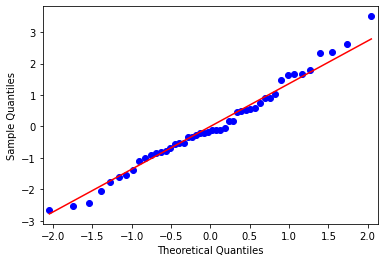

The mean of the residuals is -2.861e-14


In [24]:
## Checking the Mean of the Residuals Equals 0

import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [25]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.707
MAE 0.611
RMSE 0.841


In [26]:
## R-Squared

model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.86


In [27]:
## Confidence Intervals

# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,-0.323322,4.210608
pop_growth,0.997064,3.366766
broad_money_growth,-0.037652,0.036865
gov_final_consum_growth,-0.372408,-0.005139
gross_cap_form_growth,0.079057,0.179616
hh_consum_growth,0.325648,0.667975
unemployment,-0.570237,0.558631



Hypothesis Testing
With hypothesis testing, we are trying to determine the statistical significance of the coefficient estimates. This test is outlined as the following.

Null Hypothesis: There is no relationship between the exploratory variables and the explanatory variable.
Alternative Hypothesis: There is a relationship between the exploratory variables and the explanatory variable.


If we reject the null, we are saying there is a relationship, and the coefficients do not equal 0.
If we fail to reject the null, we are saying there is no relationship, and the coefficients do equal 0

In [28]:

# estimate the p-values
est.pvalues

const                      9.088069e-02
pop_growth                 5.996378e-04
broad_money_growth         9.830934e-01
gov_final_consum_growth    4.419934e-02
gross_cap_form_growth      5.978663e-06
hh_consum_growth           6.801951e-07
unemployment               9.835355e-01
dtype: float64

## Create a Summary of the Model Output

In [29]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     57.17
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           2.36e-18
Time:                        11:45:38   Log-Likelihood:                -82.903
No. Observations:                  48   AIC:                             179.8
Df Residuals:                      41   BIC:                             192.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

##  Remove the Insignificant Variables.

In [30]:
# define our input variable (X) & output variable
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation','broad_money_growth',
                              'unemployment'], axis = 1)

X = econ_df_after.drop('gdp_growth', axis = 1)
Y = econ_df_after[['gdp_growth']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     89.94
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           2.61e-20
Time:                        11:45:45   Log-Likelihood:                -82.904
No. Observations:                  48   AIC:                             175.8
Df Residuals:                      43   BIC:                             185.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     